## Использование готовых функций



Импорт библиотек

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from google.colab import files

Подгрузка файла

In [4]:
uploaded = files.upload()
df = pd.read_csv('Датасет CSV.csv', sep=';')

Saving Датасет CSV.csv to Датасет CSV.csv


Вывод информации

In [5]:
print("Размер датасета:", df.shape)

Размер датасета: (33, 21)


In [6]:
print("\nПервые 5 строк:")
print(df.head())


Первые 5 строк:
   Какой у вас телефон? (Айфон - 1, Андроид - 2)  Пол (М - 1, Ж - 2)  \
0                                              1                   1   
1                                              1                   2   
2                                              1                   1   
3                                              2                   1   
4                                              1                   1   

   Количество братьев/сестёр (укажите цифру)  \
0                                          1   
1                                          0   
2                                          2   
3                                          0   
4                                          0   

   ОС на ПК (MacOS - 1, Windows - 2, Linux - 3)  \
0                                             1   
1                                             2   
2                                             1   
3                                             1   
4     

In [7]:
print("\nИнформация о данных:")
print(df.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 21 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype
---  ------                                                                                                                         --------------  -----
 0   Какой у вас телефон? (Айфон - 1, Андроид - 2)                                                                                  33 non-null     int64
 1   Пол (М - 1, Ж - 2)                                                                                                             33 non-null     int64
 2   Количество братьев/сестёр (укажите цифру)                                                                                      33 non-null     int64
 3   ОС на ПК (MacOS - 1, Windows - 2, Linux - 3)                                                        

In [8]:
print("\nСтатистика данных:")
print(df.describe())


Статистика данных:
       Какой у вас телефон? (Айфон - 1, Андроид - 2)  Пол (М - 1, Ж - 2)  \
count                                      33.000000           33.000000   
mean                                        1.515152            1.151515   
std                                         0.507519            0.364110   
min                                         1.000000            1.000000   
25%                                         1.000000            1.000000   
50%                                         2.000000            1.000000   
75%                                         2.000000            1.000000   
max                                         2.000000            2.000000   

       Количество братьев/сестёр (укажите цифру)  \
count                                  33.000000   
mean                                    1.212121   
std                                     1.139012   
min                                     0.000000   
25%                                

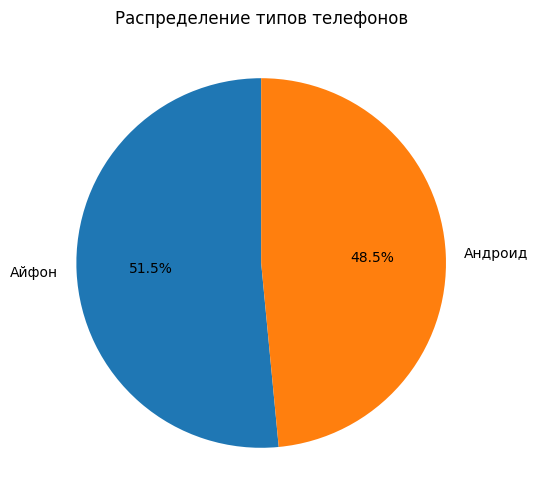

In [9]:
plt.figure(figsize=(8, 6))
target_counts = df.iloc[:, 0].value_counts()
plt.pie(target_counts.values, labels=['Айфон', 'Андроид'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение типов телефонов')
plt.show()

In [10]:
print(f"\nРаспределение целевой переменной:")
print(f"Айфон (1): {target_counts[1]} записей")
print(f"Андроид (2): {target_counts[2]} записей")


Распределение целевой переменной:
Айфон (1): 16 записей
Андроид (2): 17 записей


In [11]:
X = df.iloc[:, 1:]  # Признаки
y = df.iloc[:, 0]   # Целевая переменная

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
param_grid = {'n_neighbors': range(3, 15)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 15)}, scoring='accuracy')

In [15]:
print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность на кросс-валидации: {grid_search.best_score_:.3f}")


Лучшие параметры: {'n_neighbors': 11}
Лучшая точность на кросс-валидации: 0.810


In [16]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность на тестовой выборке: {accuracy:.3f}")


Точность на тестовой выборке: 0.400


In [18]:
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred, target_names=['Айфон', 'Андроид']))


Отчет о классификации:
              precision    recall  f1-score   support

       Айфон       0.33      0.20      0.25         5
     Андроид       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10



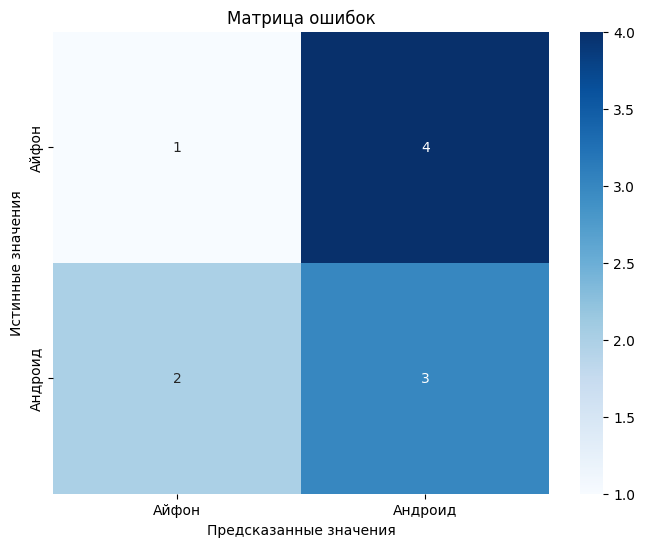

In [19]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Айфон', 'Андроид'],
            yticklabels=['Айфон', 'Андроид'])
plt.title('Матрица ошибок')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [20]:
from sklearn.inspection import permutation_importance

feature_names = df.columns[1:]
result = permutation_importance(best_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

In [21]:
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': result.importances_mean,
    'std': result.importances_std
}).sort_values('importance', ascending=False)

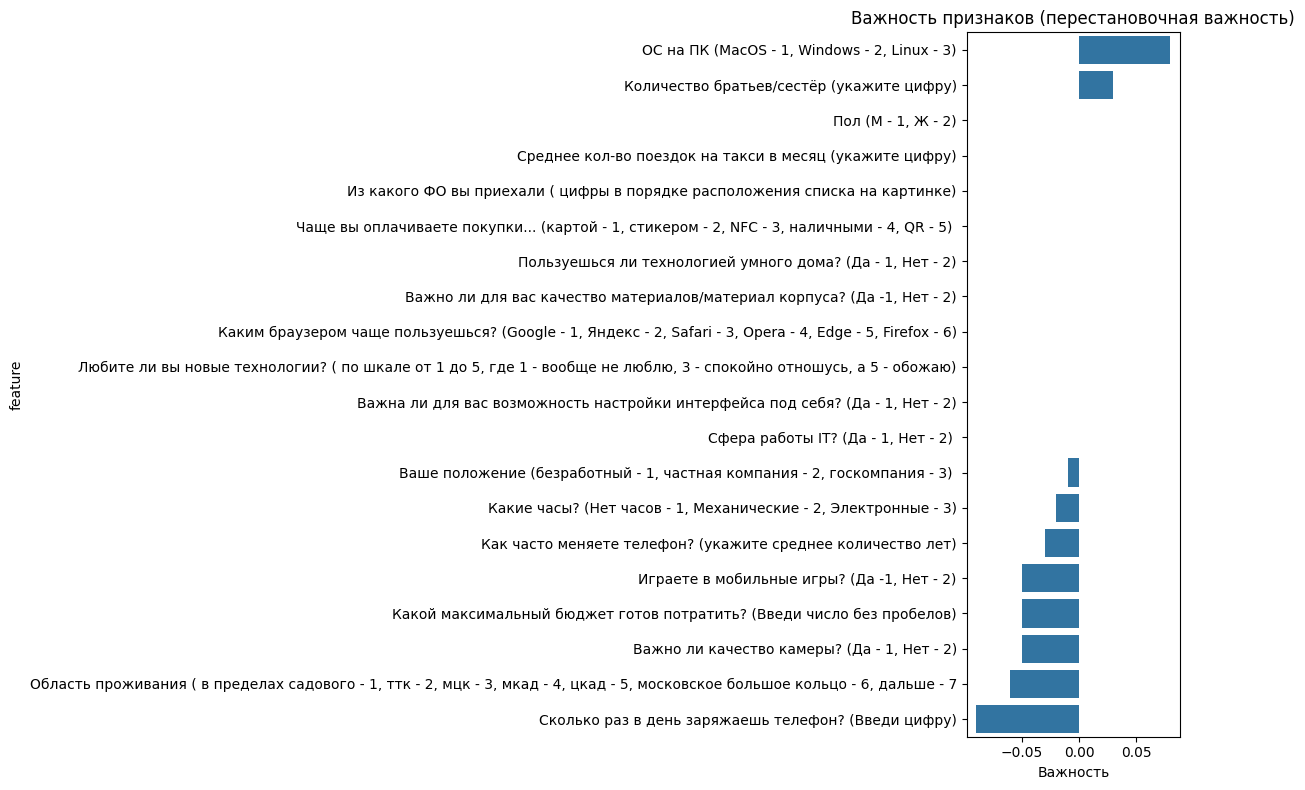

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Важность признаков (перестановочная важность)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

In [23]:
print("\nТоп-10 самых важных признаков:")
print(importance_df.head(10))


Топ-10 самых важных признаков:
                                              feature  importance       std
2        ОС на ПК (MacOS - 1, Windows - 2, Linux - 3)        0.08  0.040000
1           Количество братьев/сестёр (укажите цифру)        0.03  0.045826
0                                  Пол (М - 1, Ж - 2)        0.00  0.000000
3   Среднее кол-во поездок на такси в месяц (укажи...        0.00  0.000000
7   Из какого ФО вы приехали ( цифры в порядке рас...        0.00  0.000000
8   Чаще вы оплачиваете покупки... (картой - 1, ст...        0.00  0.000000
11  Пользуешься ли технологией умного дома? (Да - ...        0.00  0.000000
19  Важно ли для вас качество материалов/материал ...        0.00  0.000000
16  Каким браузером чаще пользуешься? (Google - 1,...        0.00  0.000000
17  Любите ли вы новые технологии? ( по шкале от 1...        0.00  0.000000


In [24]:
def predict_phone_type(features):
    """
    Предсказывает тип телефона на основе введенных признаков

    Parameters:
    features - список признаков в том же порядке, что и в датасете (без целевой переменной)
    """
    features_array = np.array(features).reshape(1, -1)
    features_scaled = scaler.transform(features_array)
    prediction = best_knn.predict(features_scaled)[0]
    probability = best_knn.predict_proba(features_scaled)[0]

    phone_type = "Айфон" if prediction == 1 else "Андроид"
    confidence = probability[prediction - 1]  # -1 т.к. prediction 1 или 2

    return phone_type, confidence

In [26]:
print("\nПример предсказания для новых данных:")
sample_features = [1, 1, 2, 15, 1, 4, 1, 1, 1, 3, 2, 2, 1, 3, 80000, 1, 2, 4, 1, 1]  # пример признаков
predicted_phone, confidence = predict_phone_type(sample_features)
print(f"Предсказанный тип телефона: {predicted_phone}")
print(f"Уверенность предсказания: {confidence:.3f}")


Пример предсказания для новых данных:
Предсказанный тип телефона: Андроид
Уверенность предсказания: 0.545


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


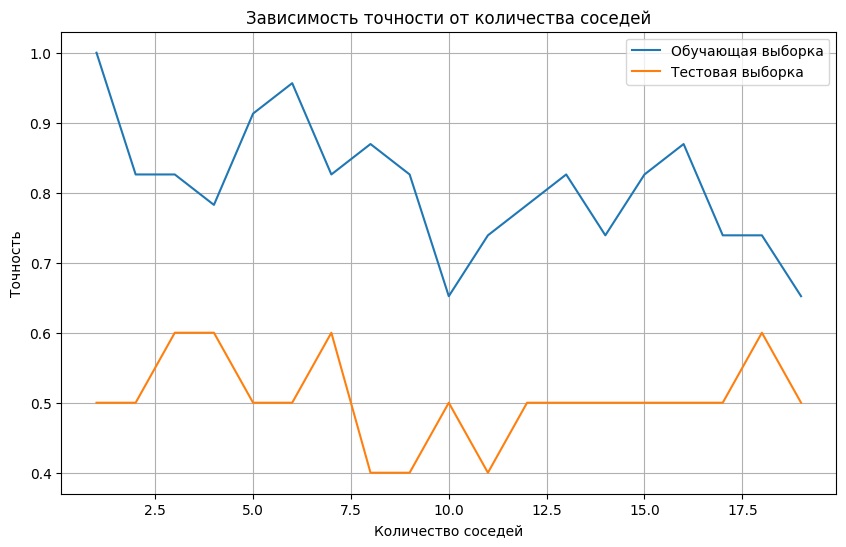

In [27]:
neighbors = range(1, 20)
train_accuracy = []
test_accuracy = []

for n in neighbors:
    knn_temp = KNeighborsClassifier(n_neighbors=n)
    knn_temp.fit(X_train_scaled, y_train)
    train_accuracy.append(knn_temp.score(X_train_scaled, y_train))
    test_accuracy.append(knn_temp.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracy, label='Обучающая выборка')
plt.plot(neighbors, test_accuracy, label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.title('Зависимость точности от количества соседей')
plt.legend()
plt.grid(True)
plt.show()

## Без готовых функций



In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [29]:
# Загрузка данных
data = pd.read_csv('Датасет CSV.csv', sep=';', encoding='utf-8')

In [30]:
# Разделение на признаки и целевую переменную
X = data.iloc[:, 1:].values  # все признаки кроме первого столбца
y = data.iloc[:, 0].values   # первый столбец - тип телефона

In [31]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Реализация метода k-ближайших соседей
def knn_predict(X_train, y_train, X_test, k=5):
    predictions = []
    for test_point in X_test:
        # Вычисление расстояний до всех точек обучения
        distances = []
        for i, train_point in enumerate(X_train):
            dist = np.sqrt(np.sum((test_point - train_point) ** 2))
            distances.append((dist, y_train[i]))

        # Сортировка по расстоянию и выбор k ближайших
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:k]

        # Голосование большинством
        k_labels = [label for _, label in k_nearest]
        most_common = Counter(k_labels).most_common(1)[0][0]
        predictions.append(most_common)

    return predictions

In [34]:
# Предсказание и оценка точности
k = 4    # вот с этим можно баловаться, точность и предсказания будут меняться
y_pred = knn_predict(X_train, y_train, X_test, k)

In [35]:
# Вычисление точности
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.60


In [36]:
# Простой анализ результатов
print(f"\nПримеры предсказаний (первые 10):")
print("Фактически\t|\tПредсказано")
print("----------\t|\t-----------")
for i in range(min(10, len(y_test))):
    actual = "Айфон" if y_test[i] == 1 else "Андроид"
    predicted = "Айфон" if y_pred[i] == 1 else "Андроид"
    print(f"{actual}   \t|\t{predicted}")


Примеры предсказаний (первые 10):
Фактически	|	Предсказано
----------	|	-----------
Андроид   	|	Айфон
Айфон   	|	Айфон
Айфон   	|	Айфон
Андроид   	|	Айфон
Андроид   	|	Андроид
Айфон   	|	Андроид
Андроид   	|	Айфон
Андроид   	|	Андроид
Айфон   	|	Айфон
Айфон   	|	Айфон
